In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, read_csv
from numpy import random
import matplotlib
from  matplotlib import pyplot as plt
import sys
print('Python version' + ' ' + sys.version)
print('Pandas version' + ' ' + pd.__version__)
print('Matplotlib ersion' + ' ' + matplotlib.__version__)

Python version 3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]
Pandas version 1.5.3
Matplotlib ersion 3.7.1


In [2]:
! python -m pip install --upgrade pip 

In [3]:
import lifelines as lifelines

In [4]:
df= pd.read_csv(r'C:\Users\cctro\OneDrive\桌面\Survival Analysis\SPH Survival Study\SPH_Mortality2013_2018(deidentified).csv')
df.tail(5)

,SN,Sex,Creatinine,Na,Albumin,K,全鈣,Hbc,P,Diabetes,Age,Vintage,Status,LOS,LOSSPH,Survival,AlbuminCode
395,10683,1,11.070,136.000,4.20,4.400,9.700,11.400,6.300,1,68.09,5.83,0,5.680000,0.020000,2.58,0
396,10761,1,8.670,136.000,4.20,4.500,8.400,10.800,4.300,1,59.17,0.52,0,0.370000,0.020000,2.58,0
397,10771,2,7.790,134.000,3.70,4.100,8.000,11.100,6.200,1,42.51,0.51,0,0.350000,0.180000,4.52,1
398,10782,2,6.940,138.000,3.90,4.400,8.900,10.500,3.200,1,75.10,0.39,0,0.230000,0.010000,2.58,0
399,10791,1,9.385,135.667,3.98,4.515,9.363,10.924,5.047,0,64.66,0.42,0,4.593166,3.930081,5.54,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SN           400 non-null    int64  
 1   Sex          400 non-null    int64  
 2   Creatinine   400 non-null    float64
 3   Na           400 non-null    float64
 4   Albumin      400 non-null    float64
 5   K            400 non-null    float64
 6   全鈣           400 non-null    float64
 7   Hbc          400 non-null    float64
 8   P            400 non-null    float64
 9   Diabetes     400 non-null    int64  
 10  Age          400 non-null    float64
 11  Vintage      400 non-null    float64
 12  Status       400 non-null    int64  
 13  LOS          400 non-null    float64
 14  LOSSPH       400 non-null    float64
 15  Survival     400 non-null    float64
 16  AlbuminCode  400 non-null    int64  
dtypes: float64(12), int64(5)
memory usage: 53.3 KB


In [6]:
T= df["Survival"]
E= df["Status"]

print(len(T))
print(len(E))
print(T.max())
print(T.min())

400
400
322.16
2.58


In [7]:
print(len(df[E==1]))
len(df['Status'].unique())

99


2

In [8]:
from lifelines import KaplanMeierFitter
kmf= KaplanMeierFitter()
kmf.fit(T, E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 400 total observations, 301 right-censored observations>

Text(0.5, 1.0, 'Survivial Analysis of SPH Dialysis Patients 2013_2018')

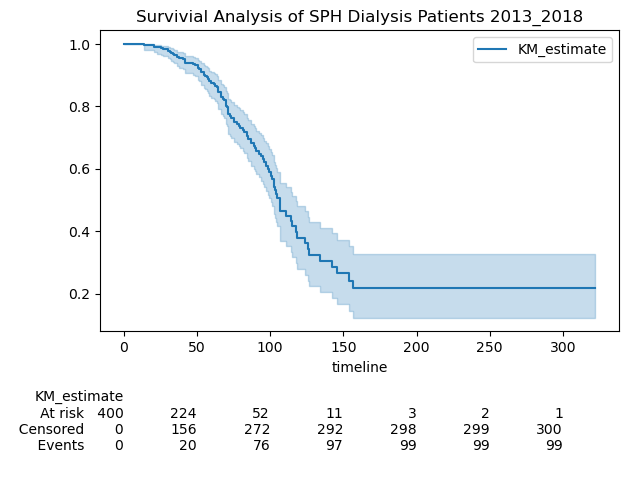

In [9]:
kmf.survival_function_
kmf.median_survival_time_
kmf.plot(at_risk_counts=True)
plt.title('Survivial Analysis of SPH Dialysis Patients 2013_2018')

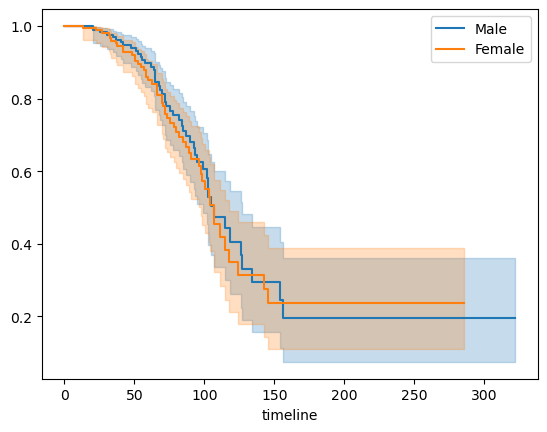

In [10]:
kmf.fit(T[df['Sex']==1], E[df['Sex']==1], label='Male')
ax= kmf.plot()

kmf.fit(T[df['Sex']==2], E[df['Sex']==2], label='Female')
ax=kmf.plot(ax=ax)

<Axes: xlabel='timeline'>

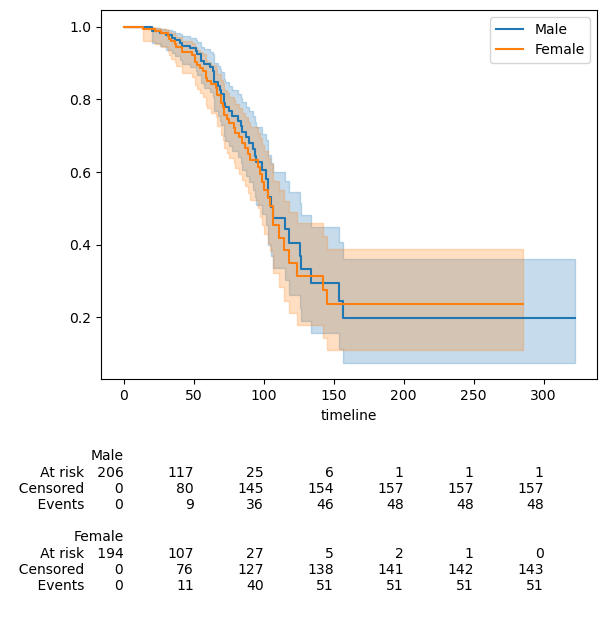

In [11]:
ax=plt.subplot(111)


kmf_male= KaplanMeierFitter()
ax=kmf_male.fit(T[df['Sex']==1], E[df['Sex']==1], label='Male').plot(ax=ax)

kmf_female= KaplanMeierFitter()
ax= kmf_female.fit(T[df['Sex']==2], E[df['Sex']==2], label='Female').plot(ax=ax)


from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_male, kmf_female, ax=ax)

In [12]:
from lifelines.utils import survival_table_from_events

table= survival_table_from_events(T,E)
print(table.head(10))
# print(table.loc[10:15])

          removed  observed  censored  entrance  at_risk
event_at                                                
0.00            0         0         0       400      400
2.58            3         0         3         0      400
3.50            1         0         1         0      397
4.52            1         0         1         0      396
5.54            6         0         6         0      395
6.20            1         0         1         0      389
6.53            5         0         5         0      388
7.55            2         0         2         0      383
7.94            1         0         1         0      381
8.53            5         0         5         0      380


In [13]:
from lifelines.statistics import logrank_test

demo= (df['Sex']==1)
results= logrank_test(T[demo], T[~demo], E[demo], E[~demo], alpha=0.95)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.23 0.63      0.66

[2 1]


C:\Users\cctro\AppData\Local\Temp\ipykernel_6192\3171143092.py:13: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,1000,100)
C:\Users\cctro\AppData\Local\Temp\ipykernel_6192\3171143092.py:13: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,1000,100)


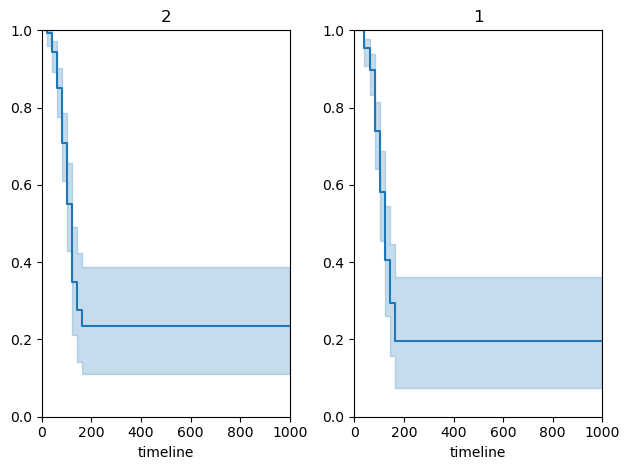

In [14]:
sex_childs= df['Sex'].unique()
print(sex_childs)

for i, sex in enumerate(sex_childs):
    ax= plt.subplot(1, 2, i+1)
    
    t=np.linspace(0,1000)
    demo= df['Sex']==sex
    kmf.fit(T[demo], E[demo], timeline=t, label= sex)
    kmf.plot(ax=ax, legend=False)
    
    plt.title(sex)
    plt.xlim(0,1000,100)
    plt.ylim(0,1)
    plt.tight_layout()

          NA_estimate
timeline             
0.00              0.0
2.58              0.0
3.50              0.0
4.52              0.0
5.54              0.0


<Axes: xlabel='timeline'>

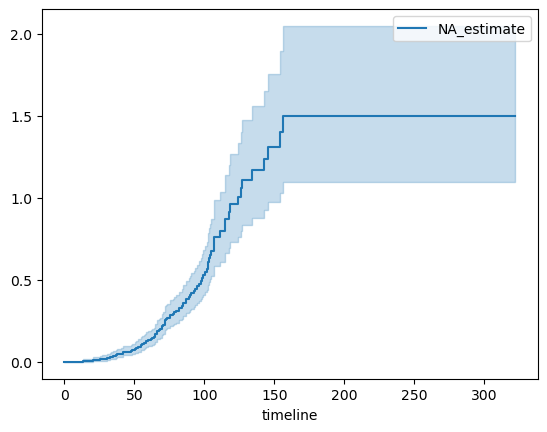

In [15]:
from lifelines import NelsonAalenFitter
naf= NelsonAalenFitter()
naf.fit(T, E)

print(naf.cumulative_hazard_.head())
naf.plot()

              Male
timeline          
156.44    1.555174
161.47    1.555174
176.88    1.555174
179.34    1.555174
322.16    1.555174
           Female
timeline         
177.01    1.39867
184.43    1.39867
189.43    1.39867
233.12    1.39867
285.23    1.39867


Text(0.5, 1.0, 'Cumulative Hazard by Sex status')

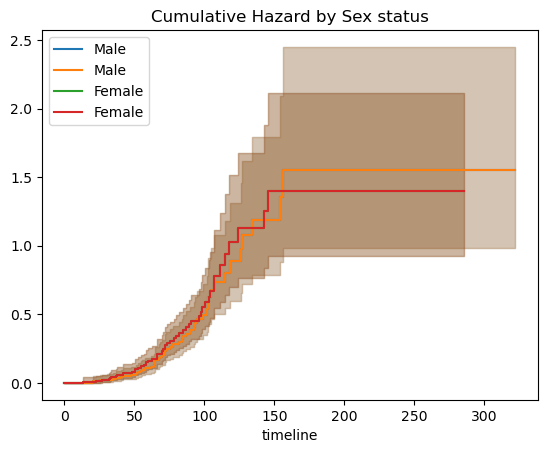

In [16]:

naf.fit(T[df['Sex']==1], E[df['Sex']==1], label='Male')
ax= naf.plot()
print(naf.cumulative_hazard_.tail())
naf.plot()

naf.fit(T[df['Sex']==2], E[df['Sex']==2], label='Female')
ax= naf.plot(ax=ax)
print(naf.cumulative_hazard_.tail())
naf.plot()

plt.legend(loc=2)
plt.title('Cumulative Hazard by Sex status')

In [17]:
from lifelines import WeibullFitter

wf= WeibullFitter()
wf.fit(T, E, label='Cumulative Hazard')
wf.print_summary()

wf.plot

<lifelines.WeibullFitter:"Cumulative Hazard", fitted with 400 total observations, 301 right-censored observations>
   number of observations = 400
number of events observed = 99
           log-likelihood = -600.23
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 143.61       7.22           129.46           157.75
rho_      2.15       0.14             1.88             2.42

          cmp to     z      p   -log2(p)
lambda_     1.00 19.76 <0.005     286.25
rho_        1.00  8.22 <0.005      52.09
---
AIC = 1204.47

<bound method ParametricUnivariateFitter.plot of <lifelines.WeibullFitter:"Cumulative Hazard", fitted with 400 total observations, 301 right-censored observations>>

Iteration 1: norm_delta = 15.99349, step_size = 0.9500, log_lik = -462.39847, newton_decrement = 70.53833, seconds_since_start = 0.0
Iteration 2: norm_delta = 10.50605, step_size = 0.0950, log_lik = -449.62163, newton_decrement = 62.69300, seconds_since_start = 0.0
Iteration 3: norm_delta = 9.37603, step_size = 0.0309, log_lik = -445.80938, newton_decrement = 61.24291, seconds_since_start = 0.0
Iteration 4: norm_delta = 8.96803, step_size = 0.0130, log_lik = -444.22196, newton_decrement = 60.74638, seconds_since_start = 0.0
Iteration 5: norm_delta = 8.80673, step_size = 0.0055, log_lik = -443.55420, newton_decrement = 60.55547, seconds_since_start = 0.0
Iteration 6: norm_delta = 8.74047, step_size = 0.0023, log_lik = -443.27252, newton_decrement = 60.47805, seconds_since_start = 0.1
Iteration 7: norm_delta = 8.71280, step_size = 0.0010, log_lik = -443.15358, newton_decrement = 60.44591, seconds_since_start = 0.1
Iteration 8: norm_delta = 8.70117, step_size = 0.0004, log_lik = -443.1033

C:\Users\cctro\anaconda3\envs\pbi\Lib\site-packages\lifelines\fitters\coxph_fitter.py:1611: ConvergenceWarning: Newton-Rhaphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


<lifelines.CoxPHFitter: fitted with 400 total observations, 301 right-censored observations>
             duration col = 'Survival'
                event col = 'Status'
      baseline estimation = breslow
   number of observations = 400
number of events observed = 99
   partial log-likelihood = -443.07
         time fit was run = 2023-05-23 07:17:25 UTC

---
              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                           
SN           -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Sex           0.00       1.00       0.22            -0.43             0.43                 0.65                 1.54
Creatinine   -0.03       0.97       0.07            -0.17             0.11                 0.85                 1.12
Na           -0.01       0.99       0.03            -0.07             0.05                 0.93                 1.05
Albumin      -0.00       1.00       0.41            -0.81             0.80                 0.45                 2.21
K             0.01       1.01       0.15            -0.29             0.31                 0.75                 1.36
全鈣           -0.02       0.98       0.12            -0.25             0.22                 0.78                 1.24
Hbc           0.00       1.00       0.09            -0.16             0.17                 0.85                 1.18
P             0.01       1.01       0.08            -0.15             0.18                 0.86                 1.20
Diabetes     -0.05       0.95       0.23            -0.51             0.41                 0.60                 1.50
Age           0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
Vintage      -0.29       0.74       0.39            -1.07             0.48                 0.34                 1.61
LOS           0.29       1.34       0.39            -0.48             1.06                 0.62                 2.89
LOSSPH       -0.04       0.96       0.05            -0.13             0.05                 0.88                 1.05
AlbuminCode  -0.12       0.89       0.32            -0.74             0.51                 0.48                 1.66

              cmp to     z    p   -log2(p)
covariate                                 
SN              0.00 -0.71 0.48       1.06
Sex             0.00  0.01 0.99       0.01
Creatinine      0.00 -0.37 0.71       0.49
Na              0.00 -0.36 0.72       0.47
Albumin         0.00 -0.01 0.99       0.01
K               0.00  0.06 0.95       0.07
全鈣              0.00 -0.15 0.88       0.18
Hbc             0.00  0.03 0.98       0.03
P               0.00  0.18 0.86       0.22
Diabetes        0.00 -0.21 0.83       0.26
Age             0.00  0.27 0.78       0.35
Vintage         0.00 -0.75 0.45       1.14
LOS             0.00  0.74 0.46       1.13
LOSSPH          0.00 -0.87 0.38       1.39
AlbuminCode     0.00 -0.37 0.71       0.49
---
Concordance = 0.89
Partial AIC = 916.13
log-likelihood ratio test = 38.66 on 15 df
-log2(p) of ll-ratio test = 10.44

<Axes: xlabel='log(HR) (95% CI)'>

C:\Users\cctro\anaconda3\envs\pbi\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  func(*args, **kwargs)
C:\Users\cctro\anaconda3\envs\pbi\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 37411 (\N{CJK UNIFIED IDEOGRAPH-9223}) missing from current font.
  func(*args, **kwargs)
C:\Users\cctro\anaconda3\envs\pbi\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cctro\anaconda3\envs\pbi\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37411 (\N{CJK UNIFIED IDEOGRAPH-9223}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


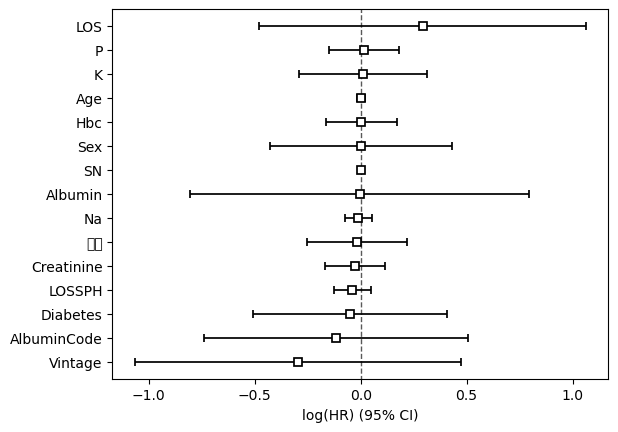

In [18]:
from lifelines import CoxPHFitter

dataset= df

cph= CoxPHFitter()
cph.fit(dataset, duration_col='Survival', event_col='Status', show_progress=True)

cph.print_summary()

cph.plot()

Iteration 1: norm_delta = 15.99349, step_size = 0.9500, log_lik = -462.39847, newton_decrement = 70.53833, seconds_since_start = 0.0
Iteration 2: norm_delta = 10.50605, step_size = 0.0950, log_lik = -449.62163, newton_decrement = 62.69300, seconds_since_start = 0.0
Iteration 3: norm_delta = 9.37603, step_size = 0.0309, log_lik = -445.80938, newton_decrement = 61.24291, seconds_since_start = 0.0
Iteration 4: norm_delta = 8.96803, step_size = 0.0130, log_lik = -444.22196, newton_decrement = 60.74638, seconds_since_start = 0.0
Iteration 5: norm_delta = 8.80673, step_size = 0.0055, log_lik = -443.55420, newton_decrement = 60.55547, seconds_since_start = 0.0
Iteration 6: norm_delta = 8.74047, step_size = 0.0023, log_lik = -443.27252, newton_decrement = 60.47805, seconds_since_start = 0.1
Iteration 7: norm_delta = 8.71280, step_size = 0.0010, log_lik = -443.15358, newton_decrement = 60.44591, seconds_since_start = 0.1
Iteration 8: norm_delta = 8.70117, step_size = 0.0004, log_lik = -443.1033

C:\Users\cctro\anaconda3\envs\pbi\Lib\site-packages\lifelines\fitters\coxph_fitter.py:1611: ConvergenceWarning: Newton-Rhaphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


<Axes: >

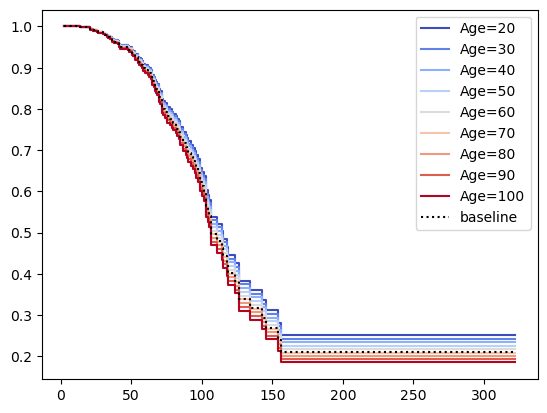

In [19]:
from lifelines import CoxPHFitter

dataset= df

cph= CoxPHFitter()
cph.fit(dataset, duration_col='Survival', event_col='Status', show_progress=True)

cph.plot_covariate_groups('Age', [20,30,40,50,60,70,80,90,100], cmap='coolwarm')